# Tensorflow 에서 MNIST 데이터셋 

In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## one hot encoding 대신 sparse_categorical_crossentropy 사용
- output이 0부터 9까지 이므로 카테고리화된 y라벨
- ![nn](img/mnist_model.png)

In [5]:
# 28x28 사이즈의 이미지 총 60000장
x_train.shape

(60000, 28, 28)

In [8]:
28*28

784

### 1. 모델 선언
- input : 이미지 한장에 28x28 = 784
- output : 0부터 9까지 라벨 10개

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2. 모델 학습 

In [13]:
import time

start_time = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=100, verbose=1)
print('time: ', time.time() - start_time)

Epoch 1/10


600/600 [==============================] - 4s 6ms/step - loss: 0.2216 - accuracy: 0.9366 - val_loss: 0.1092 - val_accuracy: 0.9677
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0843 - accuracy: 0.9751 - val_loss: 0.0890 - val_accuracy: 0.9716
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0688 - val_accuracy: 0.9785
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0659 - val_accuracy: 0.9793
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.0635 - val_accuracy: 0.9808
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0658 - val_accuracy: 0.9811
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0665 - val_accuracy: 0.9802
Epoc

### 3. test accuracy 0.98

In [17]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0710 - accuracy: 0.9810
test loss 0.07095946371555328
test accuracy 0.9810000061988831


### 4.정확도와 오차 그래프: 이상적으로 수렴한다

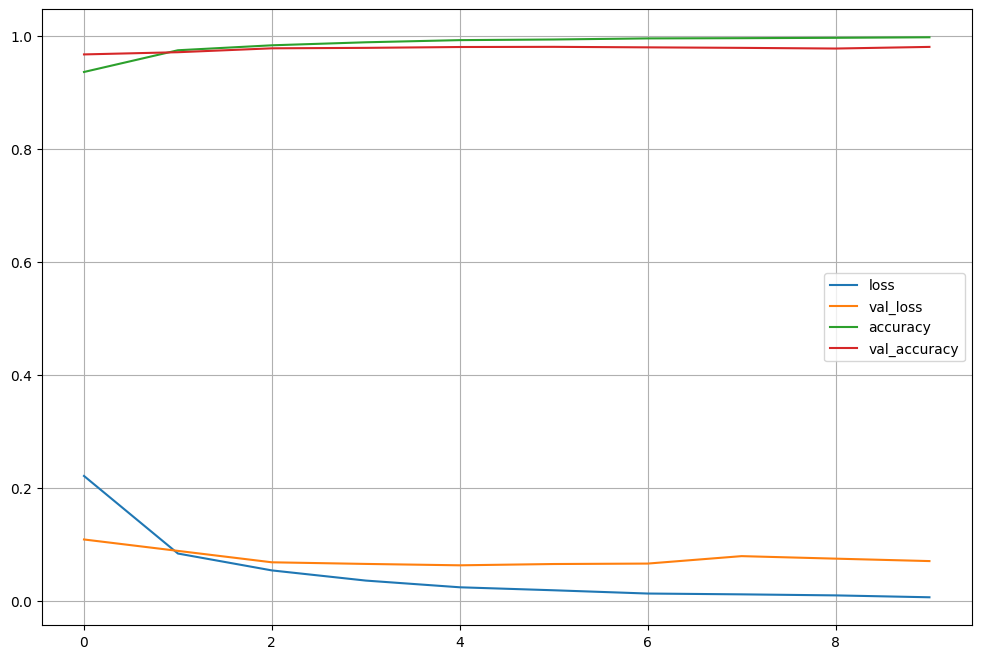

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

## 틀린 데이터 확인하기

In [18]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_label = np.argmax(predicted_result, axis=1)
predicted_label[:10]

313/313 [==============================] - 0s 948us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [25]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 190개 틀렸음..

In [26]:
wrong_result = []

for n in range(0 ,len(y_test)):
    if predicted_label[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

190

### 그중 일부만 데이터 확인해보기 4x4 = 16개 데이터. 틀릴만한 이유가 있는듯
- 28x28 이미지

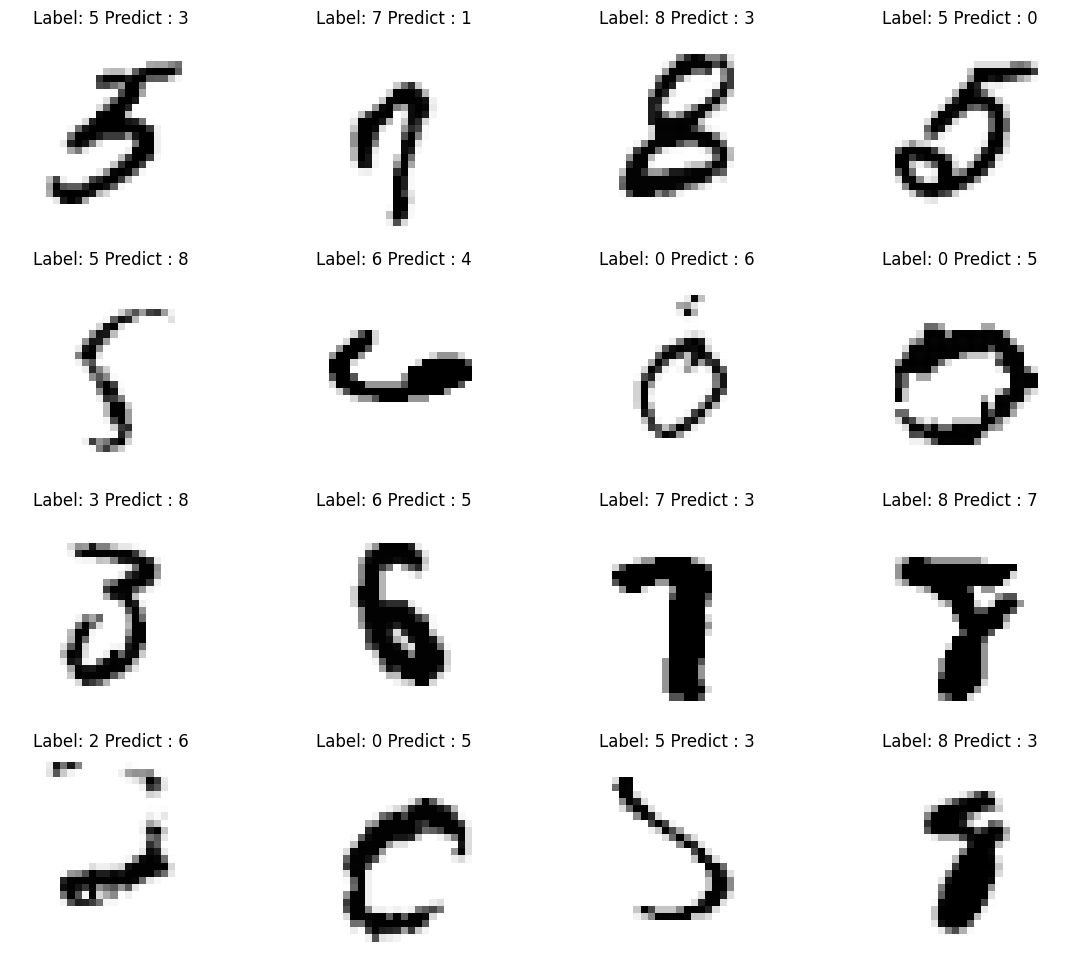

In [29]:
import random
samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label: '+str(y_test[n]) + ' Predict : ' + str(predicted_label[n]))
    plt.axis('off')

plt.show()

---

# MNIST Fashion Data

In [31]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

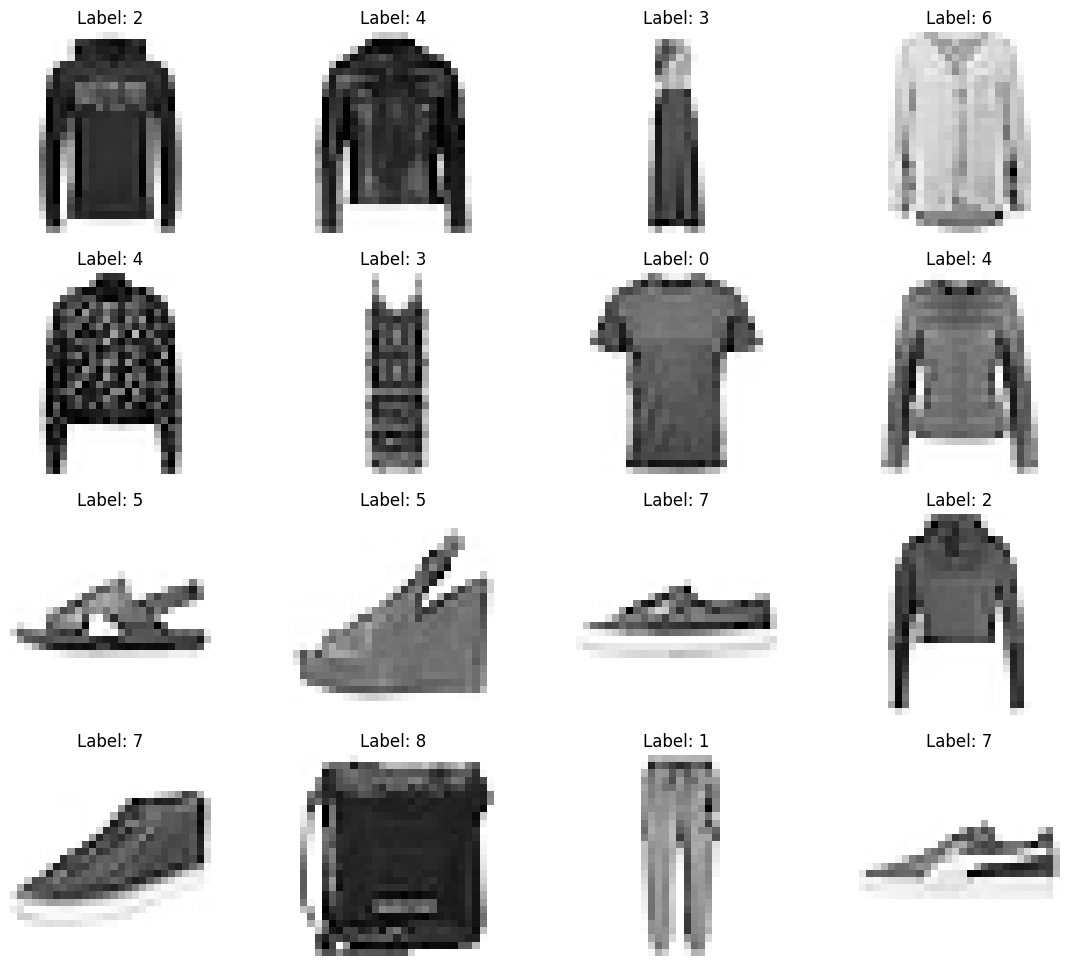

In [33]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label: ' + str(y_train[n]))
    plt.axis('off')

plt.show()

### 1. 모델선언

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2. 모델학습

In [35]:
import time

start_time = time.time()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=100, verbose=1)
print('time: ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.4839 - accuracy: 0.8285 - val_loss: 0.4201 - val_accuracy: 0.8519
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3615 - accuracy: 0.8691 - val_loss: 0.4016 - val_accuracy: 0.8546
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.3227 - accuracy: 0.8821 - val_loss: 0.3784 - val_accuracy: 0.8667
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2961 - accuracy: 0.8908 - val_loss: 0.3619 - val_accuracy: 0.8655
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2812 - accuracy: 0.8966 - val_loss: 0.3549 - val_accuracy: 0.8734
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2638 - accuracy: 0.9020 - val_loss: 0.3371 - val_accuracy: 0.8803
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2518 - accuracy: 0.9067 - val_loss: 0.3207 - val_accuracy: 0.8837
Epoch 

### 3. test accuracy 0.88

In [36]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8897
test loss 0.31314826011657715
test accuracy 0.8896999955177307


### 4.정확도와 오차 그래프: val_loss와 train loss사이에 간격이 발생한다.

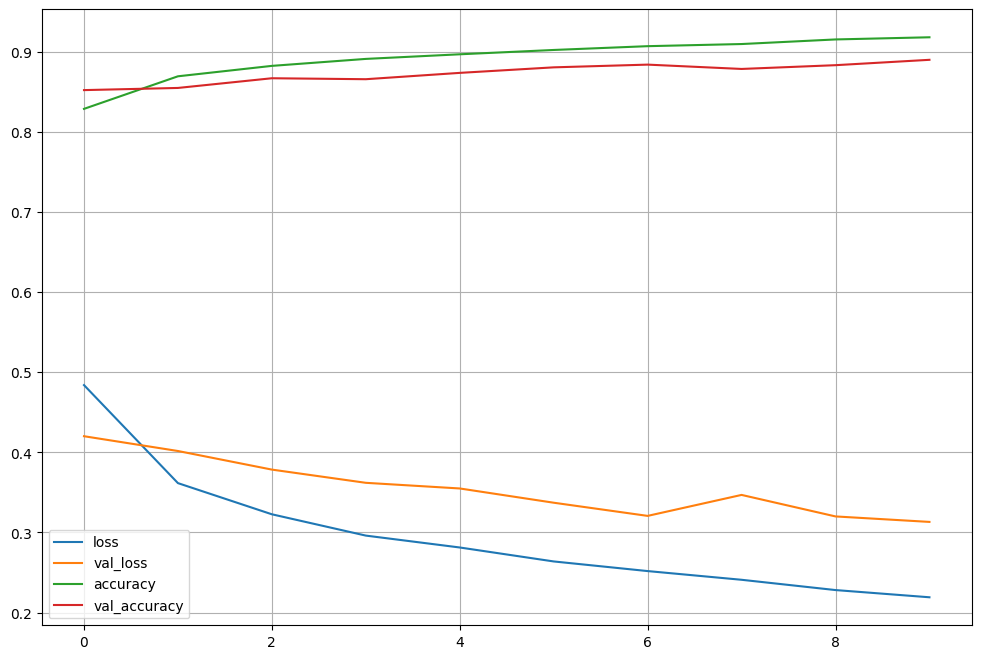

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.grid()
plt.show()